In [6]:
import numpy as np
import matplotlib.pyplot as plt

# EM2 business

In [7]:
# load data
def file_name(source, number):
    return f"resources/{source}/EM2 Part {number}.csv"
name = "Capinski"

data1_table = np.genfromtxt(file_name(name, 1), delimiter=',', skip_header=1)
data1 = {
    "frequency": data1_table[:,0], #hz
    "V0": data1_table[:,1],        #volts
    "Vc": data1_table[:,2],        #volts
    "phase": data1_table[:,3],     #degrees
}

## Part 1
- plot V_0/V_C vs angular frequency, using log-log scale
- fit with V_0/V_C = A/sqrt(1 + (w^2) * tau^2)
    - find A, tau, and their uncertainties
    - include fit in the plot
- plot phase shift vs angular frequency, using semi-log scale
    - fit with phase shift = arctan(-w * tau) // phi = -omega * tau
    - find tau and its uncertainty
    - include fit in the plot

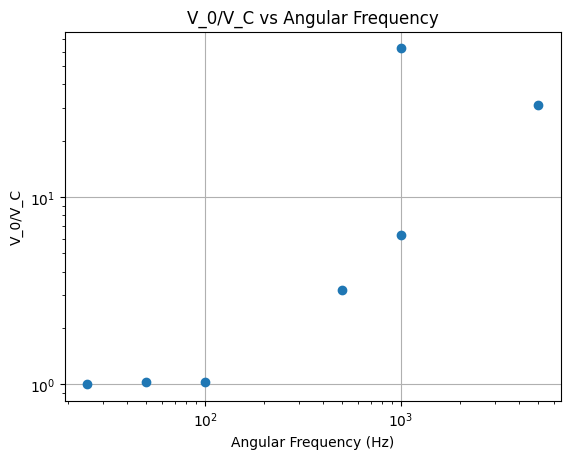

C:\Users\Theodore\AppData\Local\Temp\ipykernel_22100\1712948961.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model, data1["frequency"], data1["V0"]/data1["Vc"])


A = 15.155714286953806 +/- inf
tau = 6.789489477414208e-09 +/- inf


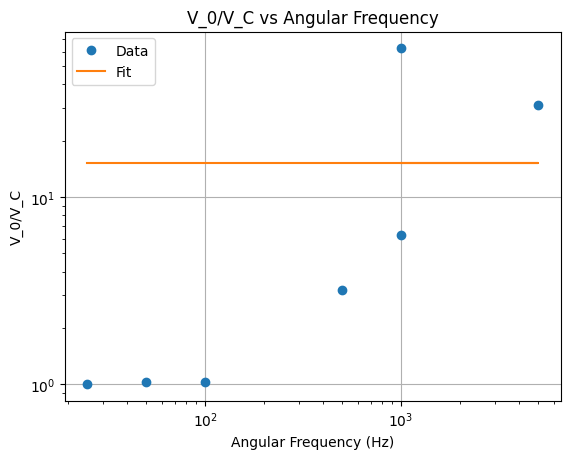

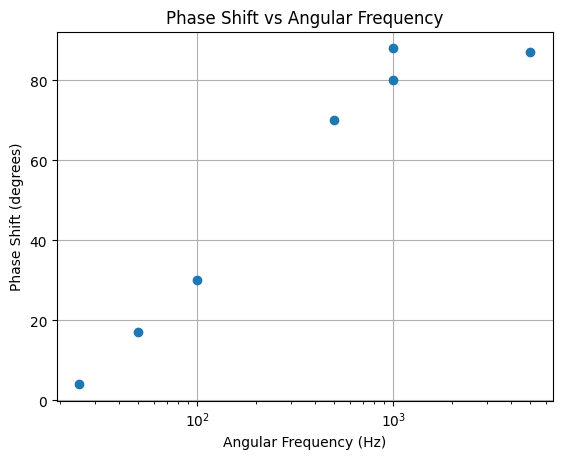

tau = -0.023546456983961184 +/- 0.008812083946358499


In [8]:
def part1():
    # plot V_0/V_C vs angular frequency, using log-log scale
    plt.figure()
    plt.loglog(data1["frequency"], data1["V0"]/data1["Vc"], 'o', label="Data")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("V_0/V_C")
    plt.title("V_0/V_C vs Angular Frequency")
    plt.grid()
    plt.show()

    # fit with V_0/V_C = A/sqrt(1 + (w^2) * tau^2)
    from scipy.optimize import curve_fit
    def model(w, A, tau):
        return A / np.sqrt(1 + (w**2) * (tau**2))
    popt, pcov = curve_fit(model, data1["frequency"], data1["V0"]/data1["Vc"])
    A, tau = popt
    dA, dtau = np.sqrt(np.diag(pcov))
    print(f"A = {A} +/- {dA}")
    print(f"tau = {tau} +/- {dtau}")

    # include fit in the plot
    plt.figure()
    plt.loglog(data1["frequency"], data1["V0"]/data1["Vc"], 'o', label="Data")
    plt.loglog(data1["frequency"], model(data1["frequency"], A, tau), label="Fit")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("V_0/V_C")
    plt.title("V_0/V_C vs Angular Frequency")
    plt.grid()
    plt.legend()
    plt.show()

    # plot phase shift vs angular frequency, using semi-log scale
    plt.figure()
    plt.semilogx(data1["frequency"], data1["phase"], 'o', label="Data")
    plt.xlabel("Angular Frequency (Hz)")
    plt.ylabel("Phase Shift (degrees)")
    plt.title("Phase Shift vs Angular Frequency")
    plt.grid()
    plt.show()

    # fit with phase shift = arctan(-w * tau) // phi = -omega * tau
    def model(w, tau):
        return -w * tau
    popt, pcov = curve_fit(model, data1["frequency"], data1["phase"])
    tau = popt[0]
    dtau = np.sqrt(np.diag(pcov))[0]
    print(f"tau = {tau  } +/- {dtau}")
part1() # all code generated by copilot